---
---
## Data Cleaning

In [3]:
# Import the organization modules
import pandas as pd
import numpy as np
# Import module to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Import the plot modules
import matplotlib.pyplot as plt
import seaborn as sns
# Import own scripts
from scripts.data_cleaning import (
    read_all_csvs, 
    clean_data,
    create_csv
    )

In [2]:
# Create data frame from all single CSV files
df = read_all_csvs()
# Clean the data
df = clean_data(df)

In [ ]:
features = df.columns.to_list()
features.remove('state')
X = df[features]
y = df.state

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

---
---
## Modeling

In [11]:
# Imports
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score, fbeta_score

---
---
### SGDClassifier

In [12]:
# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=10000, tol=1e-3))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [13]:
print("f_beta_score: ", fbeta_score(y_test, y_pred, beta = 2, average = 'macro').round(2))

# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

# Print classification report of our model
print(classification_report(y_test, y_pred))
print("--------"*10)

# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_pred)

f_beta_score:  0.76
Accuracy on train set: 0.76
Accuracy on test set: 0.76
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

      failed       0.73      0.80      0.76     25014
  successful       0.80      0.74      0.77     28378

    accuracy                           0.76     53392
   macro avg       0.76      0.77      0.76     53392
weighted avg       0.77      0.76      0.76     53392

--------------------------------------------------------------------------------


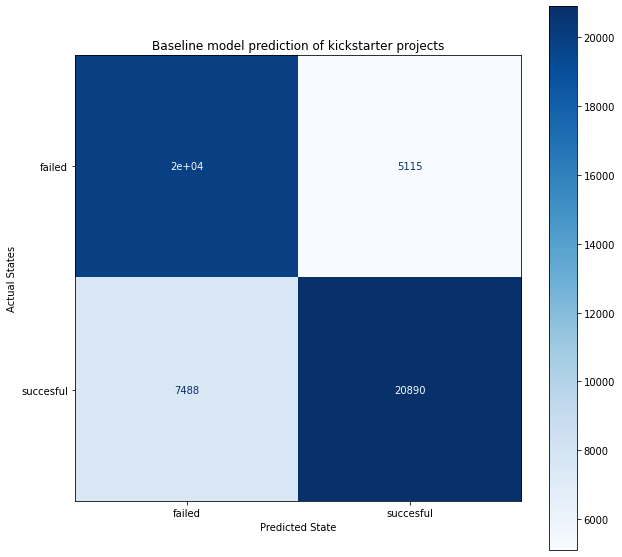

In [14]:
## Create the Confusion Matrix Display Object(cmd_obj)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['failed', 'succesful'])
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.
fig, ax = plt.subplots(figsize=(10,10))

## Set the color
cmd_obj.plot(ax=ax, cmap = 'Blues')
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.
cmd_obj.ax_.set(
                title='Baseline model prediction of kickstarter projects', 
                xlabel='Predicted State', 
                ylabel='Actual States',
                )
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

Since feature importance is crucial for consulting we want to use a white box model

---
---
### DecisionTreeClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [18]:
print("f_beta_score: ", fbeta_score(y_test, y_pred, beta = 2, average = 'macro').round(2))

# Print accuracy of our model
print("Accuracy on train set:", round(accuracy_score(y_train, y_pred_train), 2))
print("Accuracy on test set:", round(accuracy_score(y_test, y_pred), 2))
print("--------"*10)

# Print classification report of our model
print(classification_report(y_test, y_pred))
print("--------"*10)

# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_pred)

f_beta_score:  0.73
Accuracy on train set: 1.0
Accuracy on test set: 0.73
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

      failed       0.72      0.72      0.72     25014
  successful       0.75      0.75      0.75     28378

    accuracy                           0.73     53392
   macro avg       0.73      0.73      0.73     53392
weighted avg       0.73      0.73      0.73     53392

--------------------------------------------------------------------------------


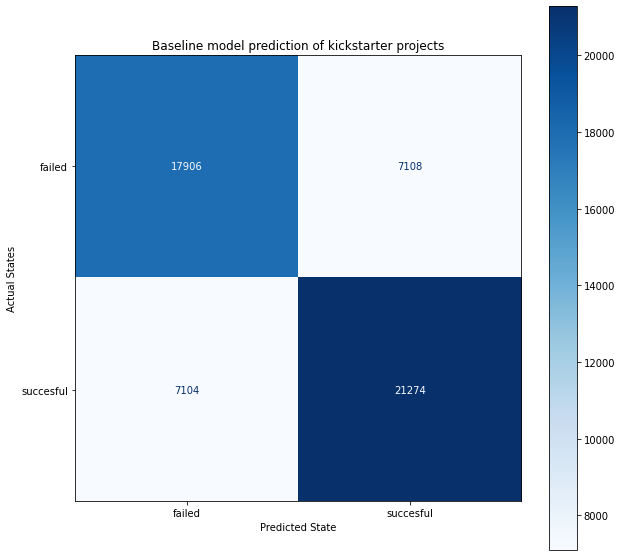

In [19]:
## Create the Confusion Matrix Display Object(cmd_obj)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['failed', 'succesful'])
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.
fig, ax = plt.subplots(figsize=(10,10))

## Set the color
cmd_obj.plot(ax=ax, cmap = 'Blues')
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.
cmd_obj.ax_.set(
                title='Baseline model prediction of kickstarter projects', 
                xlabel='Predicted State', 
                ylabel='Actual States',
                )
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

#### Feature importance

In [21]:
# let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X_train.columns, clf.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'